In [1]:
#!pip install Keras
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import models 
import keras
from scipy.signal import blackman
from ast import literal_eval
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time

In [2]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [3]:
!pip install import-ipynb
import import_ipynb

In [4]:
from create_model import CreateModel

importing Jupyter notebook from create_model.ipynb


# Vector representation of v1 

# LSTM model

# Word vectors input

## Dataset

In [5]:
url = 'data/'
url_image='image_data/'

In [6]:
# Reading a csv file named df_node
df_data = pd.read_csv(url+'df_node.csv',converters={'tf-idf': eval}) 
df_data.shape

(11856, 4)

In [7]:
df_data.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  
0       8037              68.201775  
1      11471              42.667847  
2      10517              51.243313  
3       9229              61.277162  
4       2320             174.660634

In [8]:
# Create object of class CreateModel
model_obj=CreateModel()

In [9]:
# Get 10 words with the highest text rank
word_list=model_obj.words_highest_text_rank(df_data)

In [10]:
word_list

['tel_aviv',
 'works',
 'develop',
 'product',
 'engineer',
 'able',
 'technologies',
 'skills',
 'look',
 'team',
 'company']

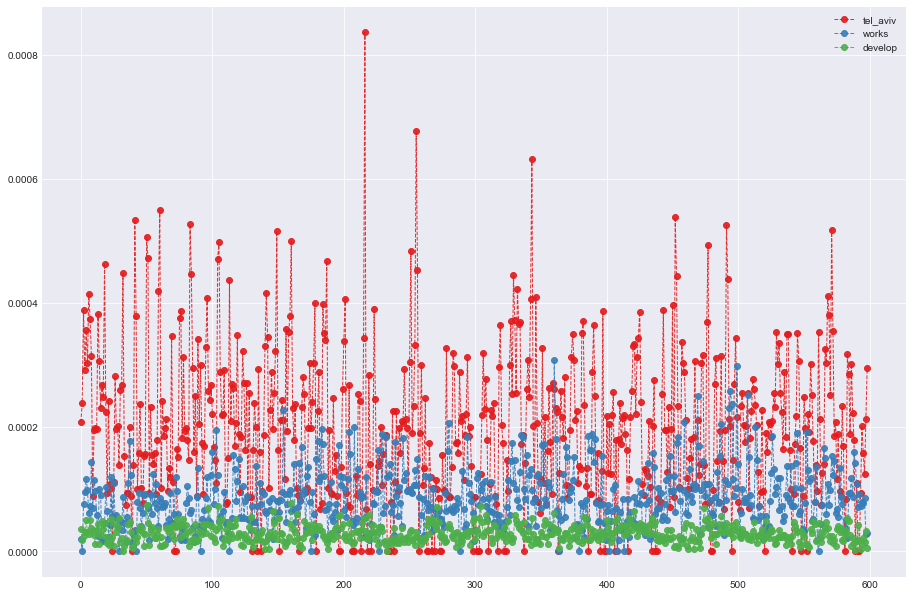

In [11]:
# Data visualization - Original data
model_obj.original_data_visualization(df_data, word_list[:3],100)

In [12]:
# Get a normalized tf from a file df_word_vectors_normalize.csv
df_data_norm = pd.read_csv(url+'df_word_vectors_normalize.csv',converters={'tf-idf': eval,'tf-idf_after_norm': eval })

In [13]:
# Merge two data frames
df_data_norm=df_data_norm.drop(['tf-idf'], axis=1)
df_data=pd.merge(df_data, df_data_norm, on=("word"))

In [14]:
df_data.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...

In [15]:
# Enter the normal tf-idf values into the dataset
dataset = pd.DataFrame(df_data['tf-idf_after_norm'].to_list()).iloc[:,:].values
dataset.shape

(11858, 699)

In [16]:
# Choose a number of time steps
n_steps = 40
# Call to function flat_split_sequences_validation
X_train, y_train, X_test, y_test, X_valid, y_valid = model_obj.flat_split_sequences_validation(dataset, n_steps)

In [17]:
y_train_lenght, y_valid_lenght, y_test_lenght= model_obj.get_lenght(X_train, X_valid, y_test)

y_train lenght : 395 , y_valid lenght : 131 , y_test lenght : 133


In [18]:
# Convert into input/output- Call to function reshape_data
X_train, y_train, X_test, y_test, X_valid, y_valid=model_obj.reshape_data(X_train, y_train, X_test, y_test, X_valid, y_valid, n_steps)
n_features = X_train.shape[2]
n_features

1

In [19]:
# Get predictive input data
full_X_train, full_y_train, full_X_test, full_y_test, full_X_valid, full_y_valid=model_obj.get_data_predict( df_data, n_steps)

# log-cosh

In [20]:
name_model='model_v1/LogCosh_LSTM_model_all_data_v1'
name_history='history_v1/LogCosh_LSTM_model_history_all_data_v1'

In [21]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.LogCosh())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [22]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


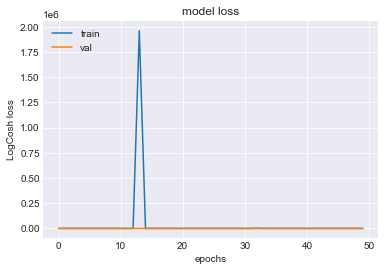

In [23]:
model_obj.model_loss(load_history,'LogCosh')

In [24]:
# Get a test and valid prediction for a logcosh loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [25]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

49285/49285 [==============================] - 390s 8ms/step - loss: 0.0029


0.0028901482000947

In [26]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...   

                                 validate_prediction  \
0  [[0.00397779], [0.00397779], [0.00397779], [0....   
1  [[0.00397779], [0.00397779], [0.00397779], [0....   
2  [[0.00397779], [0.00397779], [0.00397779], [0....   
3  [[0.00397779], [0.00397779], [0.00397779], [0....   
4  [[0.00397779], [0.00397779], [0.00397779], [0....   

                                     test_prediction  
0  [[0.00397779], [0.00397779], [0.00397779], [0....  
1  [[0.00397779], [0.00397779], [0.00397779], [0....  
2  [[0.00397779], [0.00397779], [0.00397779], [0....  
3  [[0.00397779], [0.00397779], [0.00397779], [0....  
4  [[0.009681245], [0.009490591], [0.0093625765],...

### Visualization of words prediction - LogCosh loss

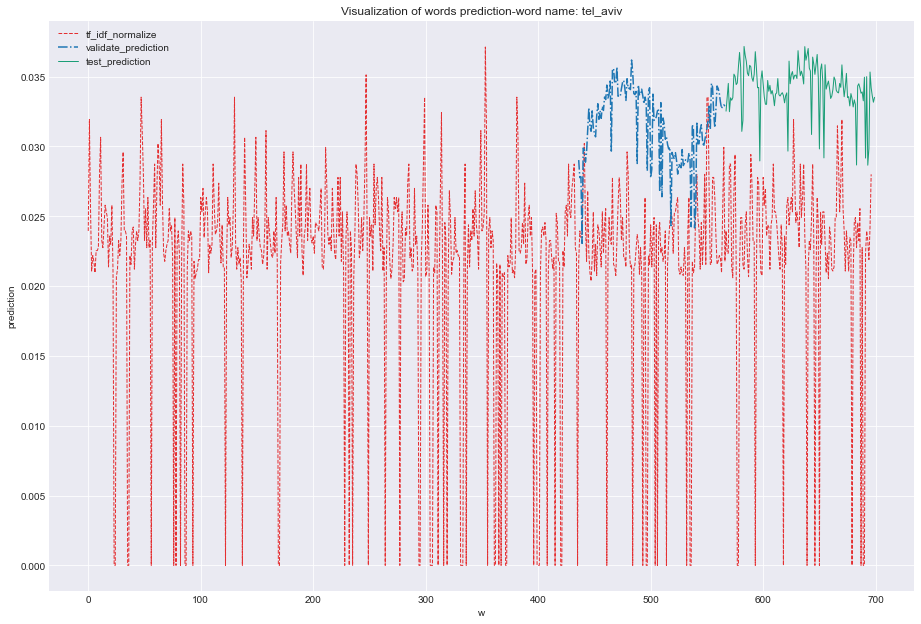

In [27]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

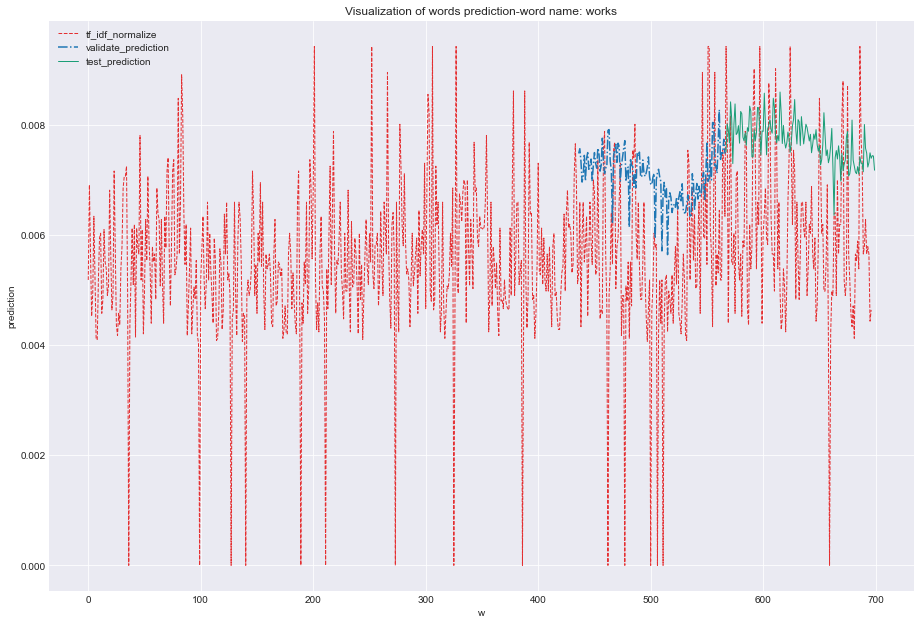

In [28]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

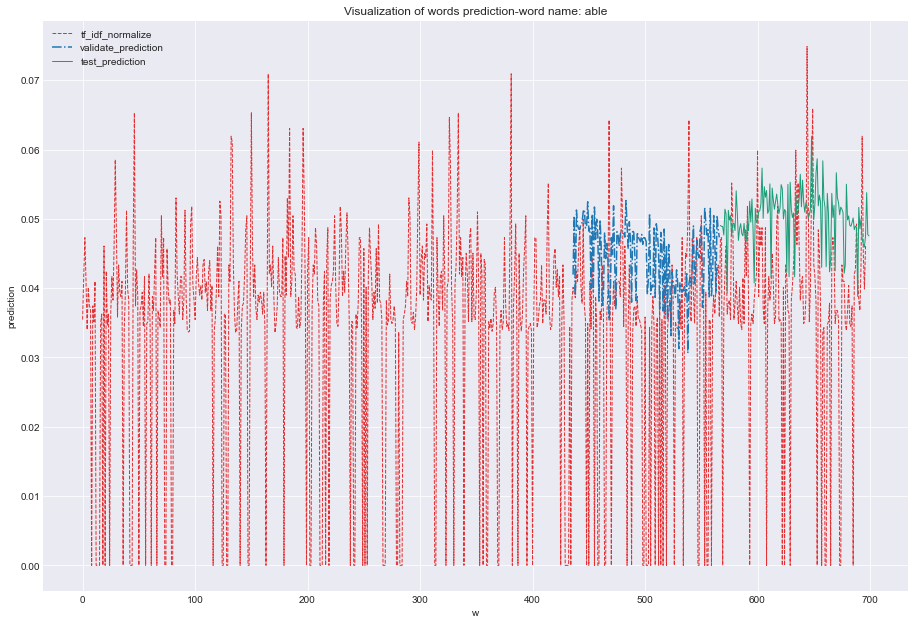

In [29]:
model_obj.data_visualization_prediction(df_prediction,word_list[5:6] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

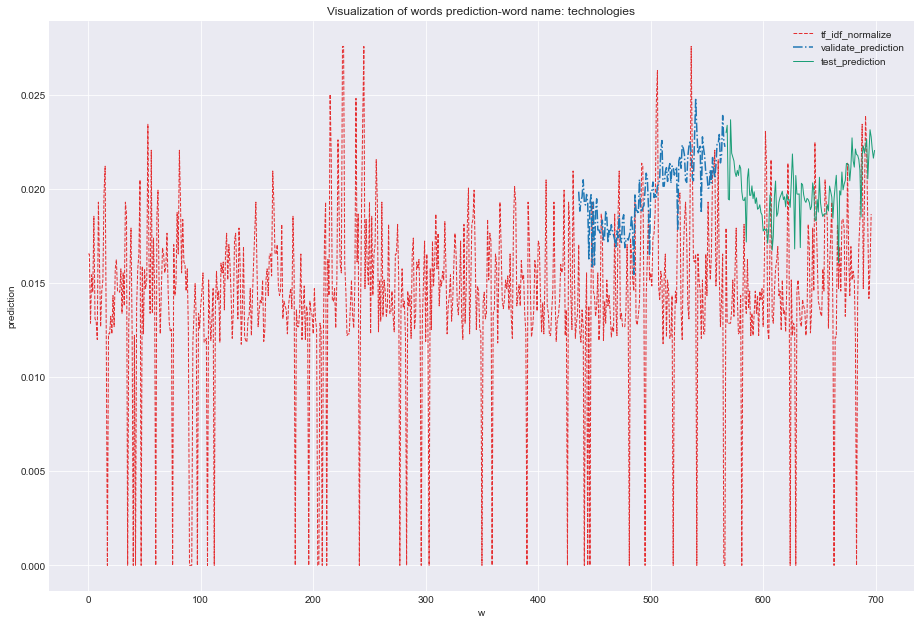

In [30]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

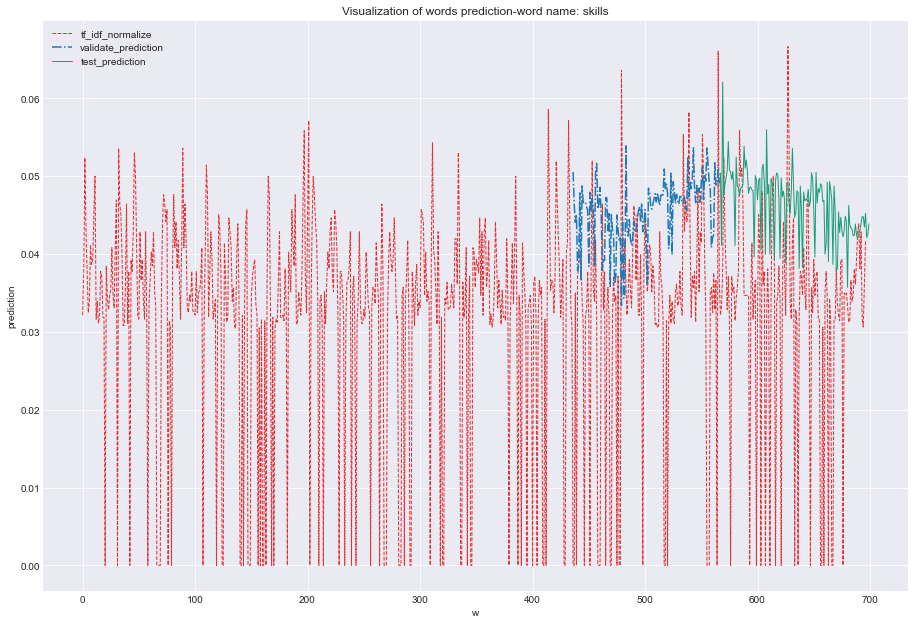

In [31]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

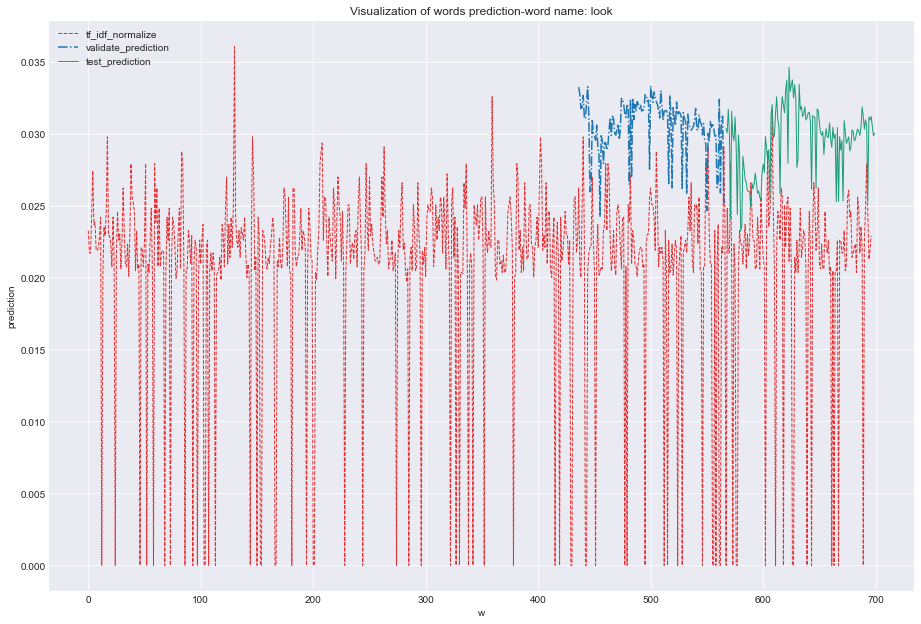

In [32]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

# Huber

In [33]:
name_model='model_v1/Huber_LSTM_model_all_data_v1'
name_history='history_v1/Huber_LSTM_model_history_all_data_v1'

In [34]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps,tf.keras.losses.Huber())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [35]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


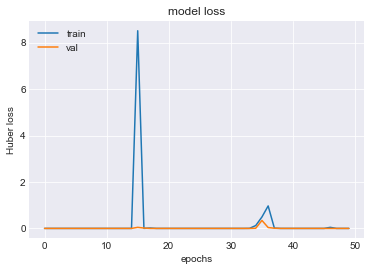

In [36]:
model_obj.model_loss(load_history,'Huber')

In [37]:
# Get a test and valid prediction for a Huber loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [38]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

49285/49285 [==============================] - 401s 8ms/step - loss: 0.0032


0.003158578183501959

In [39]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...   

                                 validate_prediction  \
0  [[0.004160097], [0.004160097], [0.004160097], ...   
1  [[0.004160097], [0.004160097], [0.004160097], ...   
2  [[0.004160097], [0.004160097], [0.004160097], ...   
3  [[0.004160097], [0.004160097], [0.004160097], ...   
4  [[0.004160097], [0.004160097], [0.004160097], ...   

                                     test_prediction  
0  [[0.004160097], [0.004160097], [0.004160097], ...  
1  [[0.004160097], [0.004160097], [0.004160097], ...  
2  [[0.004160097], [0.004160097], [0.004160097], ...  
3  [[0.004160097], [0.004160097], [0.004160097], ...  
4  [[0.01191947], [0.011654172], [0.0113902595], ...

### Visualization of words prediction - Huber loss

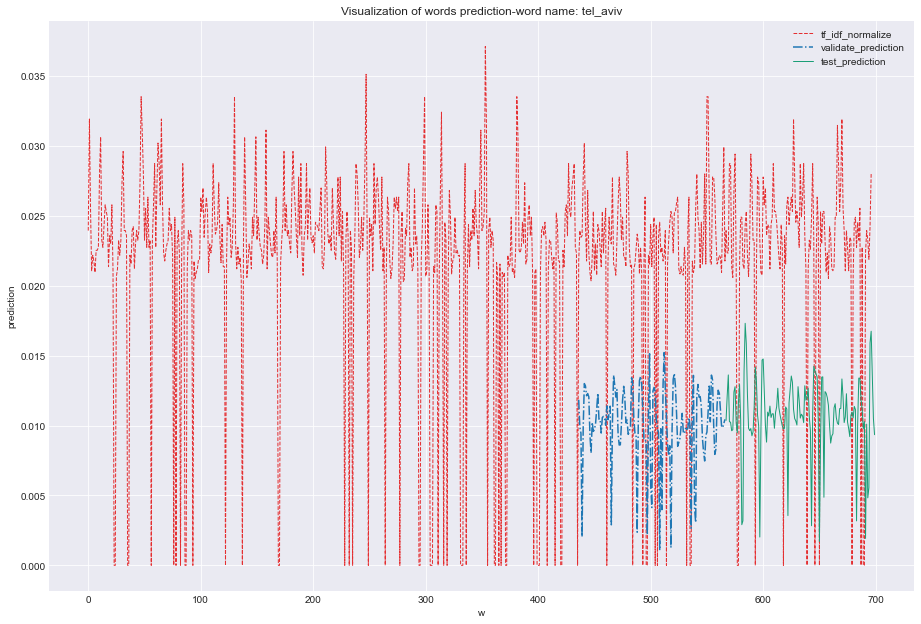

In [40]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

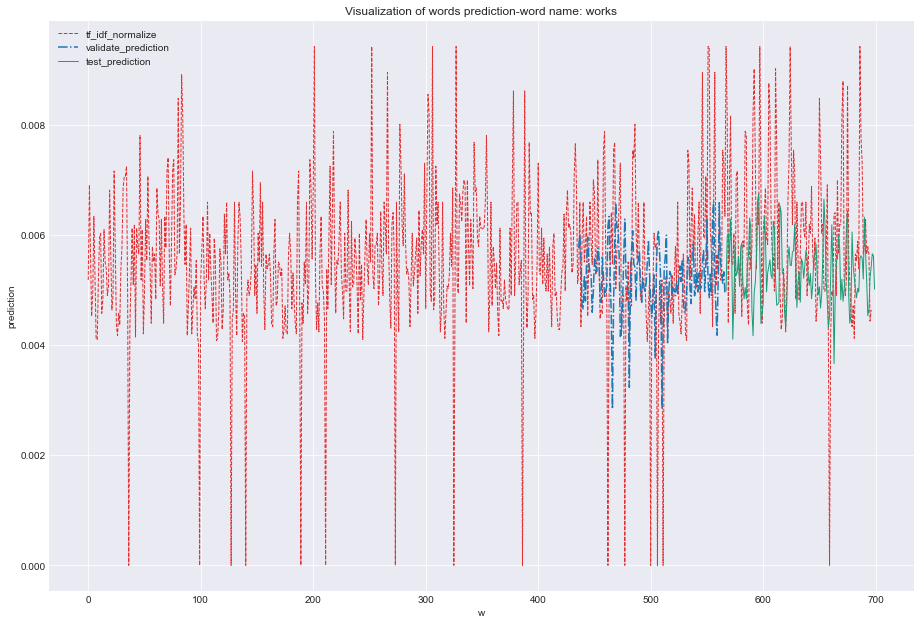

In [41]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

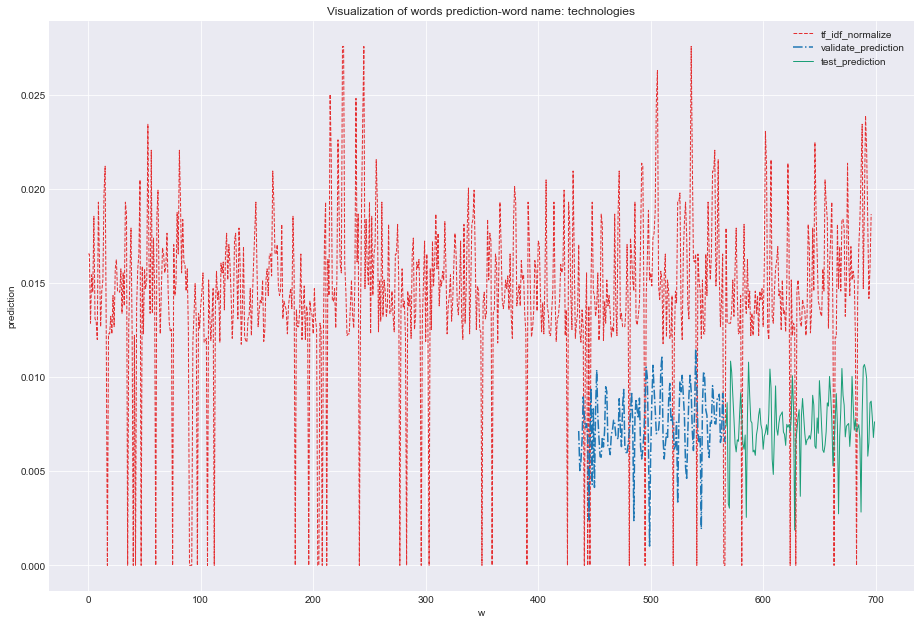

In [42]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

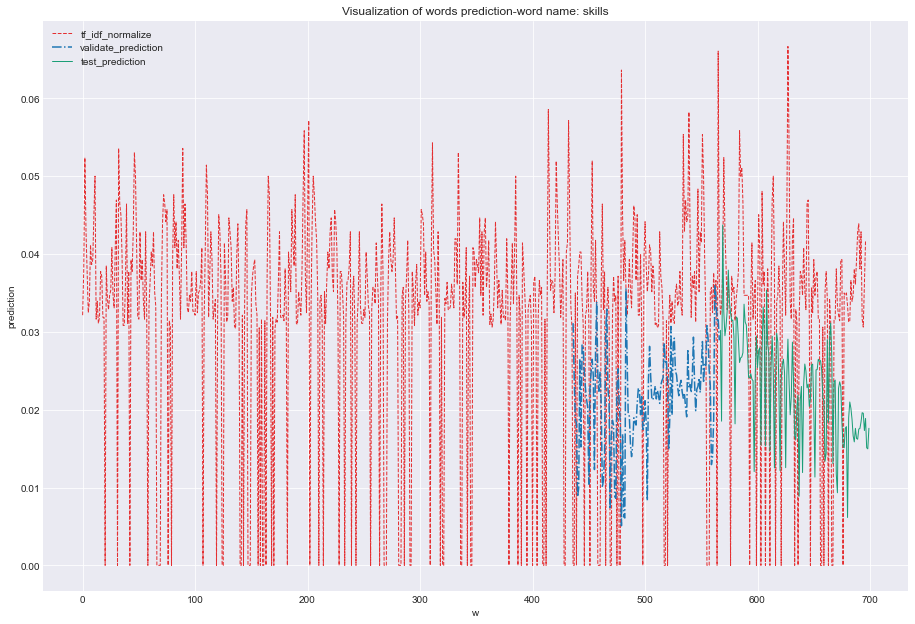

In [43]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

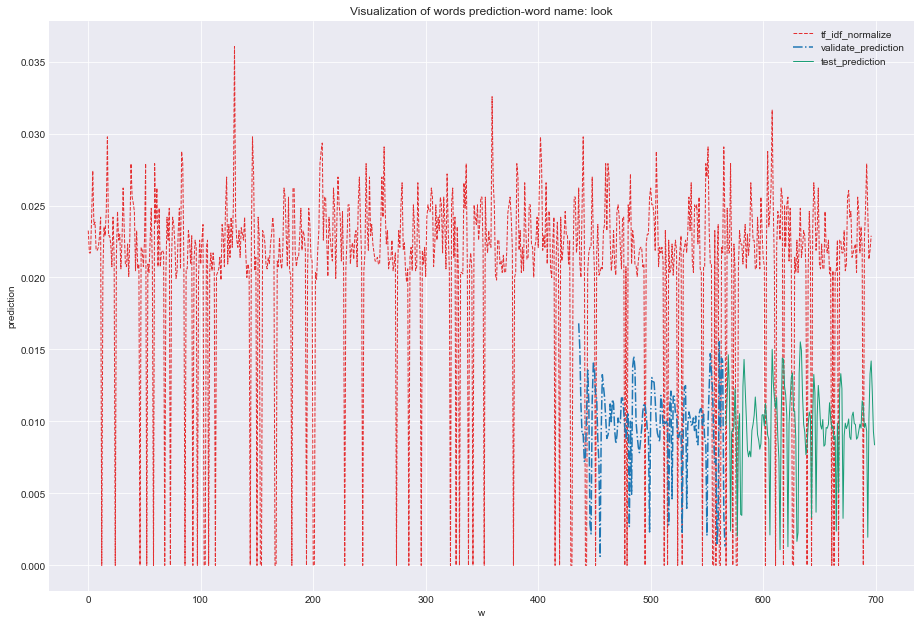

In [44]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## Logarithmic

In [45]:
name_model='model_v1/Logarithmic_model_all_data_V1_LSTM'
name_history='history_v1/Logarithmic_model_history_all_data_V1_LSTM'

In [46]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.MeanSquaredLogarithmicError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [47]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


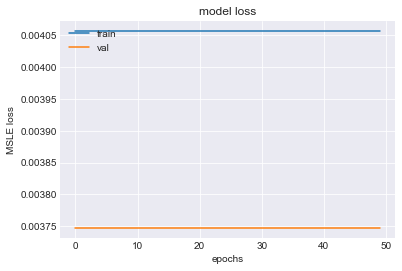

In [48]:
model_obj.model_loss(load_history,'MSLE')

In [49]:
# Get a test and valid prediction for a MSLE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [50]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

49285/49285 [==============================] - 413s 8ms/step - loss: 0.0044


0.004418302793055773

In [51]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...   

                                 validate_prediction  \
0  [[-0.07403314], [-0.07403314], [-0.07403314], ...   
1  [[-0.07403314], [-0.07403314], [-0.07403314], ...   
2  [[-0.07403314], [-0.07403314], [-0.07403314], ...   
3  [[-0.07403314], [-0.07403314], [-0.07403314], ...   
4  [[-0.07403314], [-0.07403314], [-0.07403314], ...   

                                     test_prediction  
0  [[-0.07403314], [-0.07403314], [-0.07403314], ...  
1  [[-0.07403314], [-0.07403314], [-0.07403314], ...  
2  [[-0.07403314], [-0.07403314], [-0.07403314], ...  
3  [[-0.07403314], [-0.07403314], [-0.07403314], ...  
4  [[-0.0749864], [-0.07482562], [-0.07468746], [...

### Visualization of words prediction - MAE loss

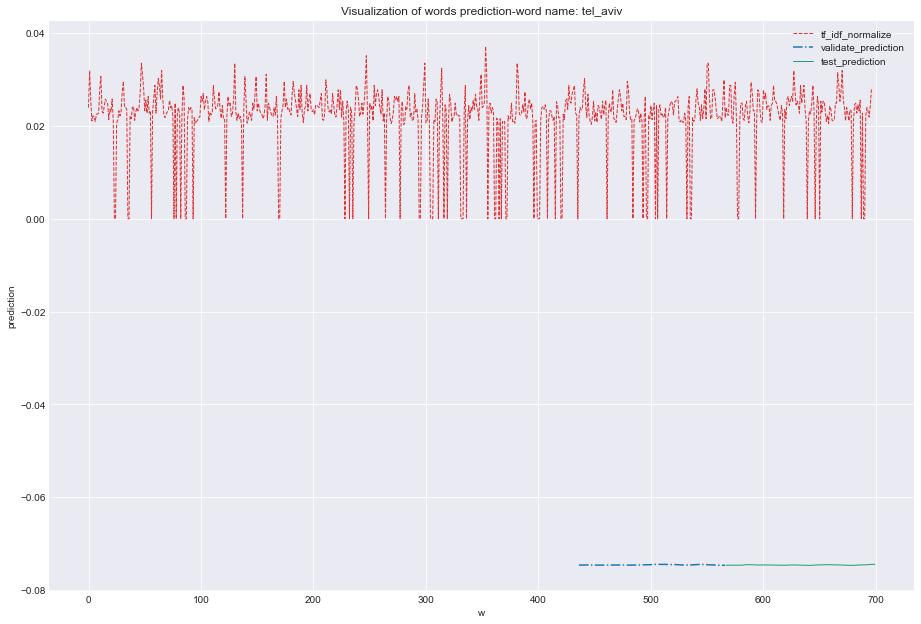

In [52]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

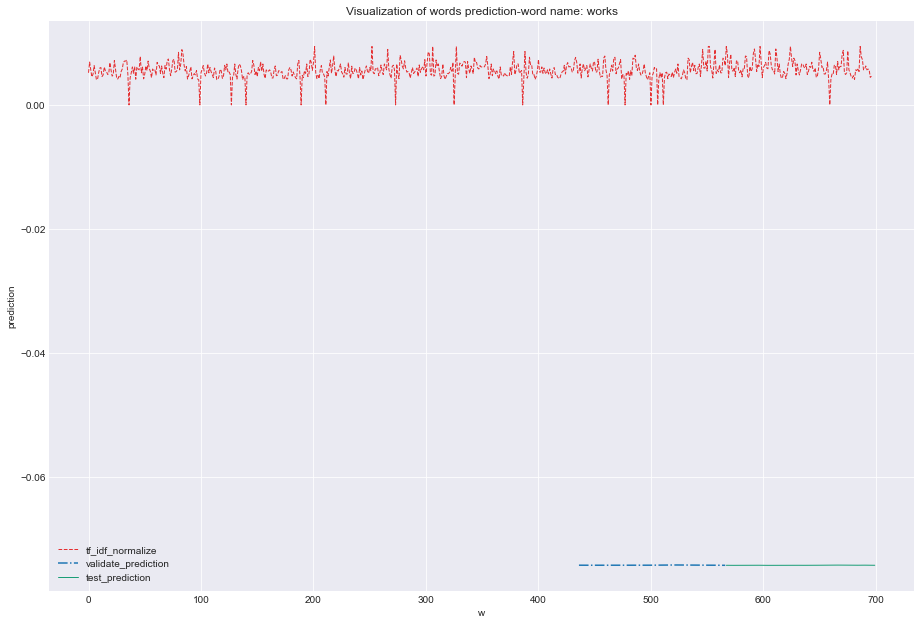

In [53]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

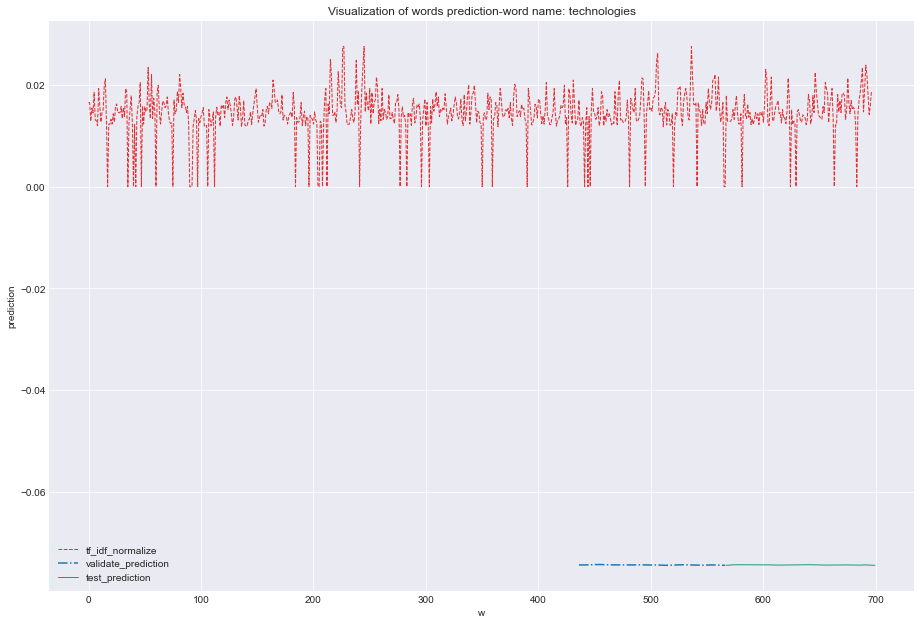

In [54]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

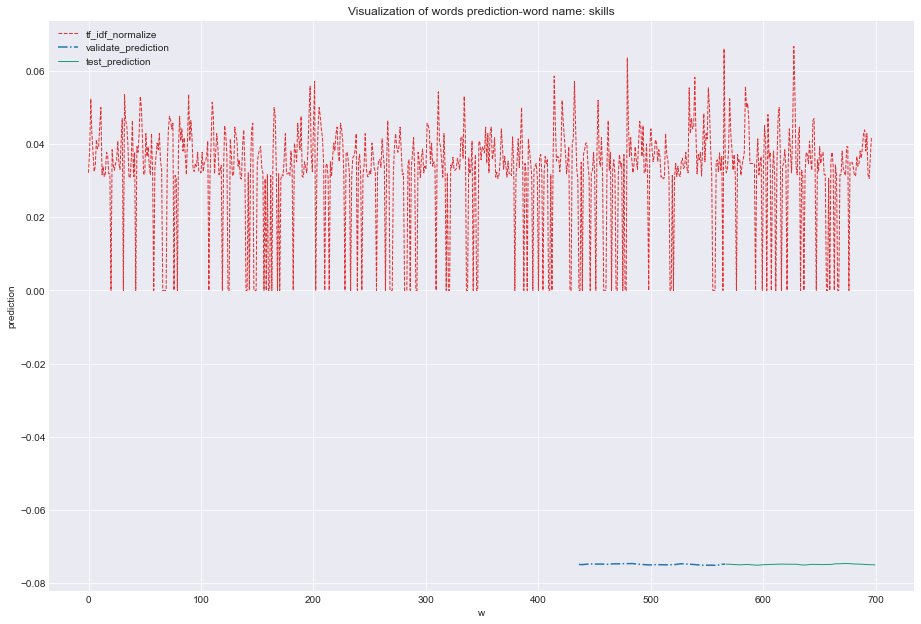

In [55]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

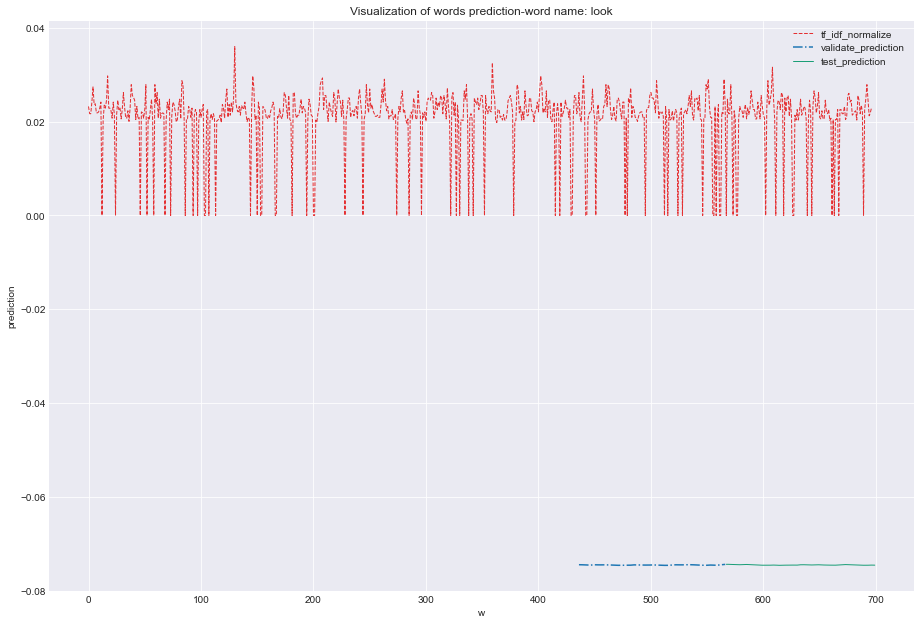

In [56]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MAE

In [57]:
name_model='model_v1/MAE_LSTM_model_all_data_v1'
name_history='history_v1/MAE_LSTM_model_history_all_data_v1'

In [58]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.MeanAbsoluteError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [59]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


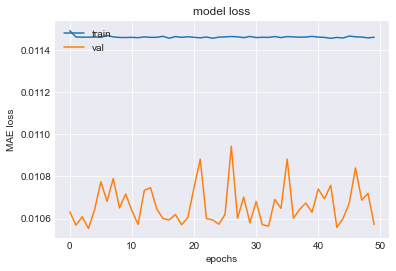

In [60]:
model_obj.model_loss(load_history,'MAE')

In [61]:
# Get a test and valid prediction for a MAE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [62]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

49285/49285 [==============================] - 390s 8ms/step - loss: 0.0122


0.01221202127635479

In [63]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...   

                                 validate_prediction  \
0  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...   
1  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...   
2  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...   
3  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...   
4  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...   

                                     test_prediction  
0  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...  
1  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...  
2  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...  
3  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...  
4  [[-2.1581634e-05], [-2.1581634e-05], [-2.15816...

### Visualization of words prediction - MAE loss

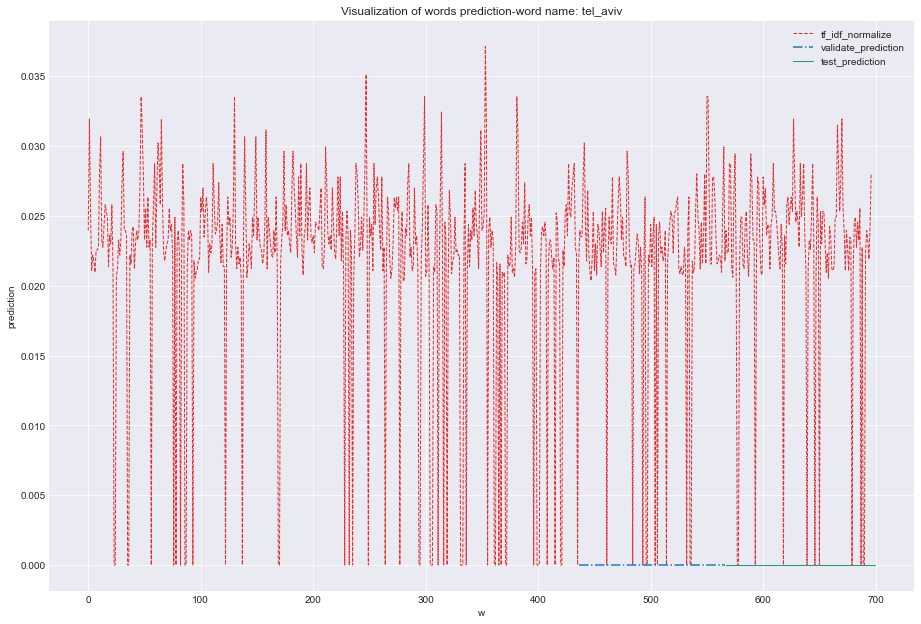

In [64]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

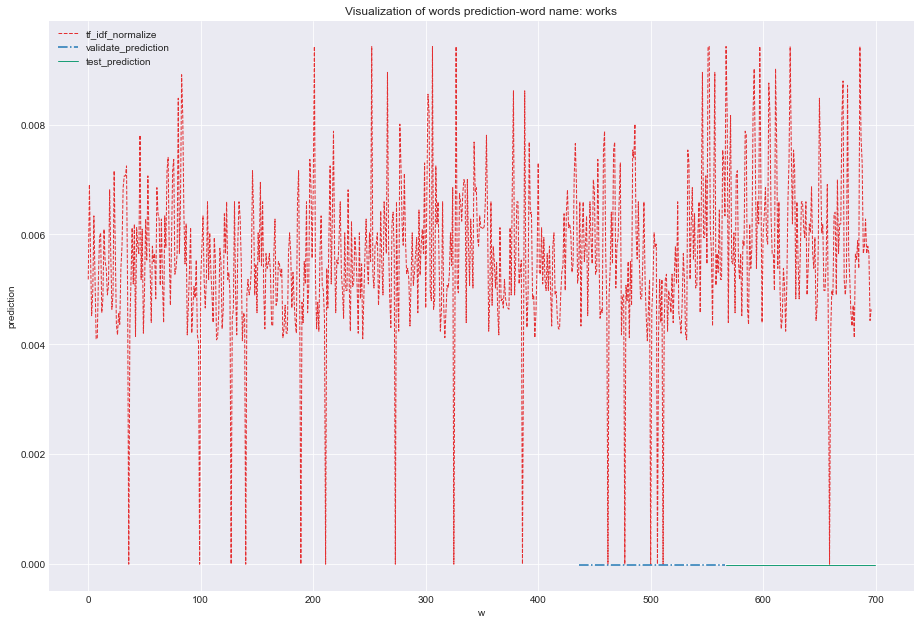

In [65]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

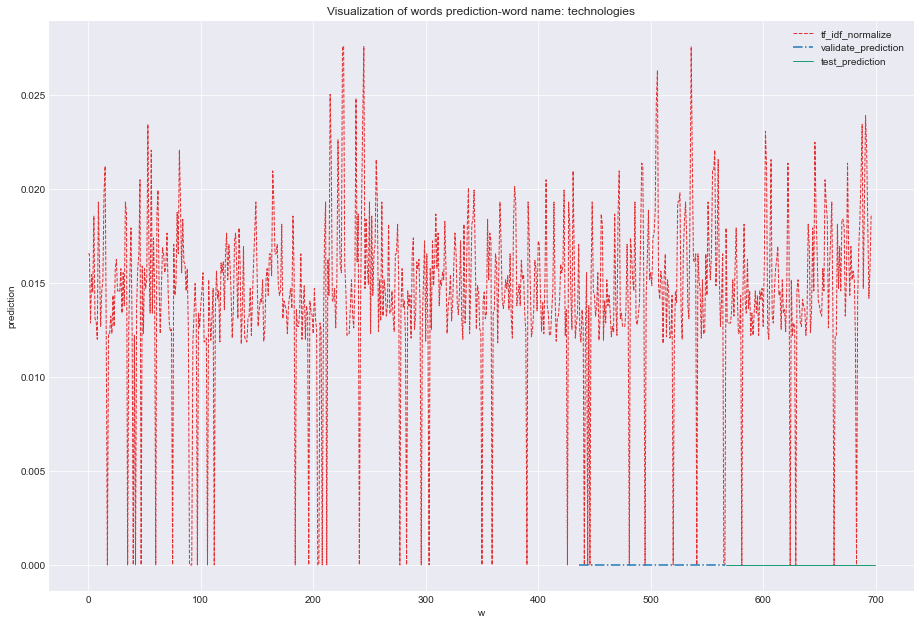

In [66]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

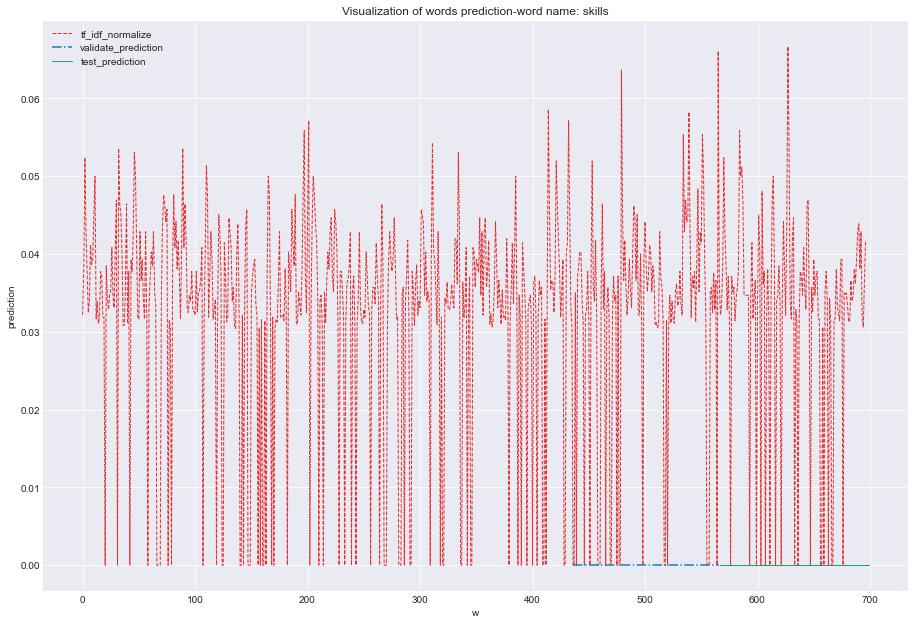

In [67]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

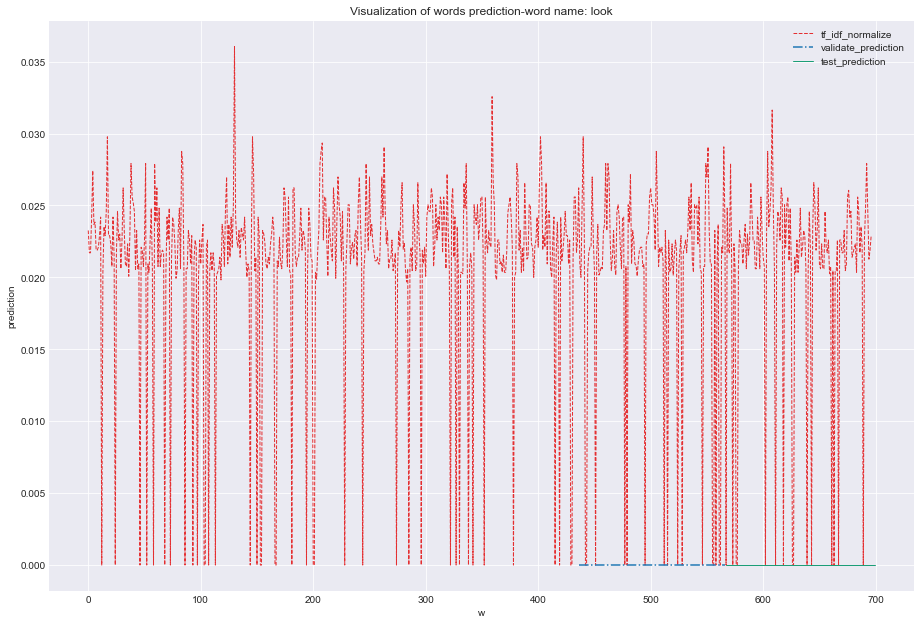

In [68]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)